In [1]:
import pandas as pd
df = pd.read_csv("../data/raw/Pokemon.csv")
df.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [2]:
df.shape
df.columns.tolist()


['#',
 'Name',
 'Type 1',
 'Type 2',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary']

In [3]:
print("Shape:", df.shape)
df.info()


Shape: (800, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
# Missing values
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


Type 2    386
dtype: int64

In [5]:
# Duplicates
df.duplicated().sum()


np.int64(0)

In [6]:
# Target balance
df["Legendary"].value_counts()


Legendary
False    735
True      65
Name: count, dtype: int64

In [7]:
df = df.copy()

df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace("#", "pokedex_number", regex=False)
      .str.replace(" ", "_", regex=False)
      .str.replace(".", "", regex=False)
)

df.columns.tolist()


['pokedex_number',
 'name',
 'type_1',
 'type_2',
 'total',
 'hp',
 'attack',
 'defense',
 'sp_atk',
 'sp_def',
 'speed',
 'generation',
 'legendary']

In [8]:
df["type_2"] = df["type_2"].fillna("None")
df["type_2"].value_counts().head()


type_2
None       386
Flying      97
Ground      35
Poison      34
Psychic     33
Name: count, dtype: int64

In [9]:
df["legendary"] = df["legendary"].astype(int)
df["legendary"].value_counts()


legendary
0    735
1     65
Name: count, dtype: int64

In [10]:
df.isna().sum().sort_values(ascending=False).head(10)
df.dtypes
df.head()


,pokedex_number,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,0


In [12]:
df.to_csv("../data/processed/pokemon_clean.csv", index=False)


In [13]:
df.columns.tolist()

['pokedex_number',
 'name',
 'type_1',
 'type_2',
 'total',
 'hp',
 'attack',
 'defense',
 'sp_atk',
 'sp_def',
 'speed',
 'generation',
 'legendary']

In [14]:
df.describe()

,pokedex_number,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000


In [15]:
df["legendary"].value_counts(normalize=True)

legendary
0    0.91875
1    0.08125
Name: proportion, dtype: float64

In [16]:
stats_cols = ["hp","attack","defense","sp_atk","sp_def","speed","total"]
df.groupby("legendary")[stats_cols].mean().round(1)


,hp,attack,defense,sp_atk,sp_def,speed,total
legendary,,,,,,,
0,67.2,75.7,71.6,68.5,68.9,65.5,417.2
1,92.7,116.7,99.7,122.2,105.9,100.2,637.4


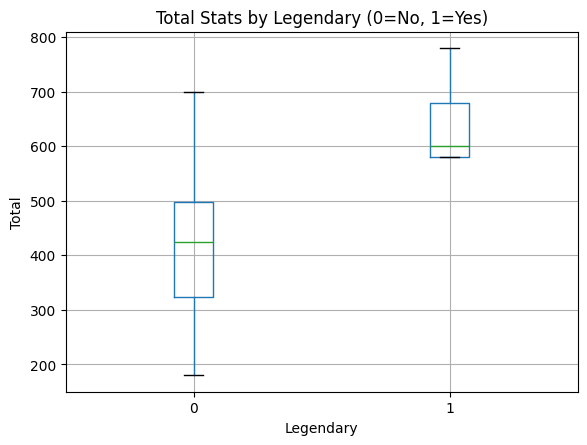

In [17]:
import matplotlib.pyplot as plt

df.boxplot(column="total", by="legendary")
plt.title("Total Stats by Legendary (0=No, 1=Yes)")
plt.suptitle("")
plt.xlabel("Legendary")
plt.ylabel("Total")
plt.show()


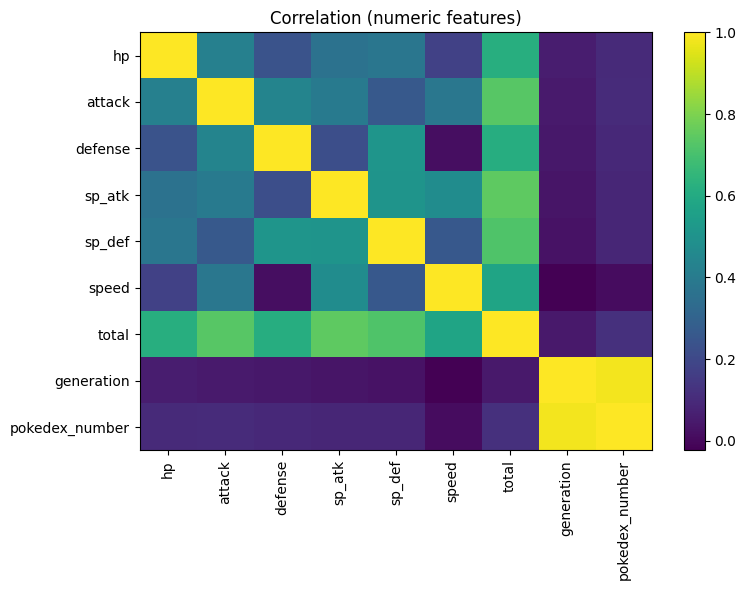

In [18]:
import numpy as np
import matplotlib.pyplot as plt

corr = df[stats_cols + ["generation","pokedex_number"]].corr(numeric_only=True)

plt.figure(figsize=(8,6))
plt.imshow(corr, aspect="auto")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar()
plt.title("Correlation (numeric features)")
plt.tight_layout()
plt.show()


In [19]:
df.groupby("generation")["legendary"].sum()


generation
1     6
2     5
3    18
4    13
5    15
6     8
Name: legendary, dtype: int64

In [20]:
df["type_1"].value_counts().head(10)
df[df["legendary"]==1]["type_1"].value_counts().head(10)


type_1
Psychic     14
Dragon      12
Fire         5
Rock         4
Water        4
Steel        4
Electric     4
Ground       4
Grass        3
Ice          2
Name: count, dtype: int64

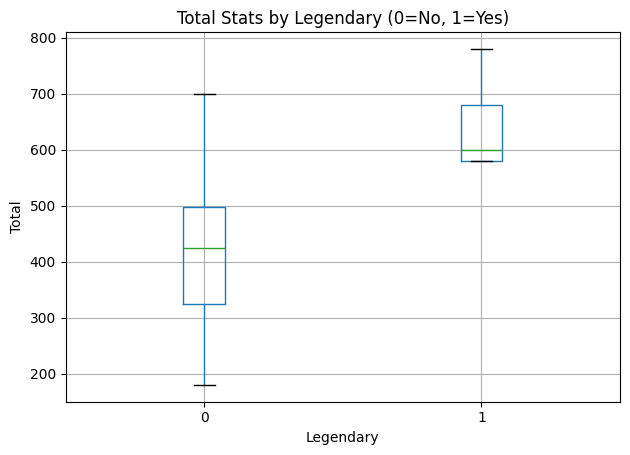

In [21]:
import matplotlib.pyplot as plt

ax = df.boxplot(column="total", by="legendary")
plt.title("Total Stats by Legendary (0=No, 1=Yes)")
plt.suptitle("")
plt.xlabel("Legendary")
plt.ylabel("Total")
plt.tight_layout()
plt.savefig("../reports/figures/total_by_legendary.png", dpi=150)
plt.show()


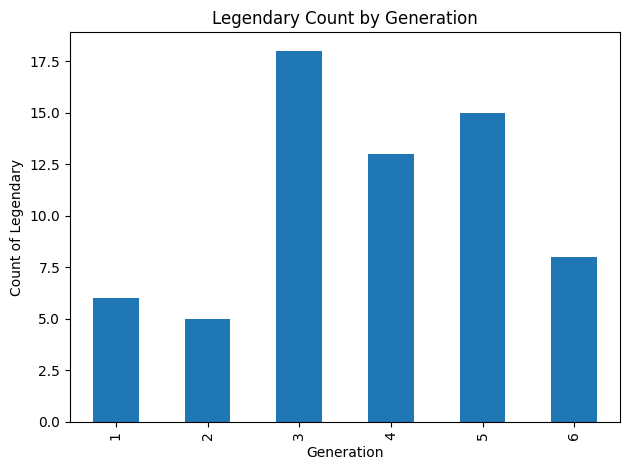

In [22]:
gen_leg = df.groupby("generation")["legendary"].sum()

plt.figure()
gen_leg.plot(kind="bar")
plt.title("Legendary Count by Generation")
plt.xlabel("Generation")
plt.ylabel("Count of Legendary")
plt.tight_layout()
plt.savefig("../reports/figures/legendary_by_generation.png", dpi=150)
plt.show()


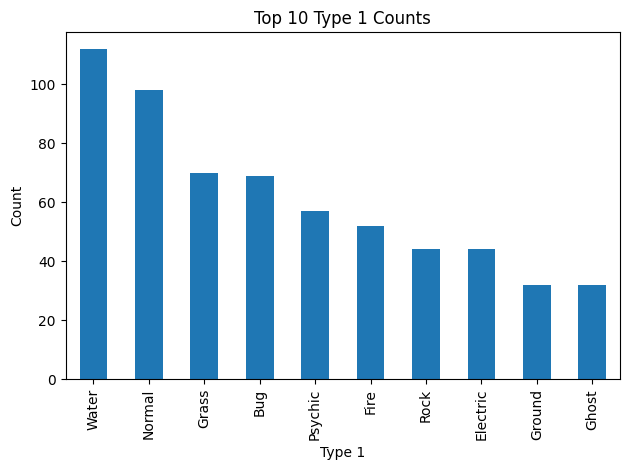

In [23]:
top_types = df["type_1"].value_counts().head(10)

plt.figure()
top_types.plot(kind="bar")
plt.title("Top 10 Type 1 Counts")
plt.xlabel("Type 1")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../reports/figures/top10_type1.png", dpi=150)
plt.show()
